1. Create a straight line dataset using the linear regression formula (weight * X + bias).
* Set weight=0.3 and bias=0.9 there should be at least 100 datapoints total.
* Split the data into 80% training, 20% testing.
* Plot the training and testing data so it becomes visual.

In [66]:
#Show when last updated(for doccumentation purposes)
import datetime
print(f"Last updated: {datetime.datetime.now()}")

Last updated: 2024-06-04 08:52:56.167628


In [67]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [68]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [69]:
weight=0.3
bias=0.9

start=0
end=1
step=0.01
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

In [70]:
len(X)

100

In [71]:
train_split=int(0.8*len(X))
X_train,y_train=X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(80, 80, 20, 20)

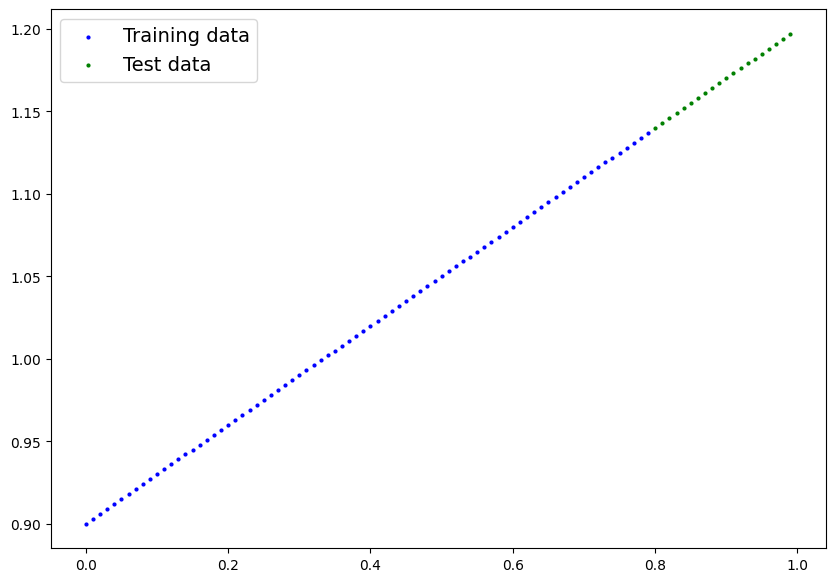

In [72]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):

  plt.figure(figsize=(10,7))

  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")

  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Prediction")

  plt.legend(prop={"size":14})

plot_predictions(X_train,y_train,X_test,y_test)

2. Build a PyTorch model by subclassing `nn.Module`.
* Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for weights and one for bias.
* Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
* Once you've constructed the model, make an instance of it and check its `state_dict()`.
* **Note**: If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [73]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)

  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

In [74]:
torch.manual_seed(42)
model=LinearRegressionModel()

In [75]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [76]:
weight,bias

(0.3, 0.9)

3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
* Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
* Write a training loop to perform the appropriate training steps for 300 epochs.
* The training loop should test the model on the test dataset every 20 epochs.

In [77]:
#Create loss fn
loss_fn=nn.L1Loss()

#create optimizer
optimizer=torch.optim.SGD(params=model.parameters(),lr=0.01)

In [78]:
torch.manual_seed(42)
epochs=300
epoch_count=[]
train_loss_values=[]
test_loss_values=[]

for epoch in range(epochs+1):
  model.train() #training setup
  y_preds=model(X_train) #forward pass
  train_loss=loss_fn(y_preds,y_train) #loss
  optimizer.zero_grad() #gradient reset
  train_loss.backward() #backpropagation
  optimizer.step() #optimizer step

  model.eval() #testing setup
  with torch.inference_mode(): #grad remove
    test_preds=model(X_test) #forward pass
    test_loss=loss_fn(test_preds,y_test) #loss fn

    if epoch % 20 == 0: # print setup
      epoch_count.append(epoch)
      train_loss_values.append(train_loss)
      test_loss_values.append(test_loss)
      print(f"Epochs: {epoch} | Training loss: {train_loss} | Test loss: {test_loss}")

Epochs: 0 | Training loss: 0.12756133079528809 | Test loss: 0.33650320768356323
Epochs: 20 | Training loss: 0.08187223970890045 | Test loss: 0.2184026539325714
Epochs: 40 | Training loss: 0.07207288593053818 | Test loss: 0.17458662390708923
Epochs: 60 | Training loss: 0.06507987529039383 | Test loss: 0.15310418605804443
Epochs: 80 | Training loss: 0.05822876840829849 | Test loss: 0.1367770880460739
Epochs: 100 | Training loss: 0.05137667804956436 | Test loss: 0.12079393863677979
Epochs: 120 | Training loss: 0.044525571167469025 | Test loss: 0.10446684062480927
Epochs: 140 | Training loss: 0.037674423307180405 | Test loss: 0.08813951164484024
Epochs: 160 | Training loss: 0.03082224354147911 | Test loss: 0.0721558928489685
Epochs: 180 | Training loss: 0.02397105097770691 | Test loss: 0.055828340351581573
Epochs: 200 | Training loss: 0.01711984910070896 | Test loss: 0.03950077295303345
Epochs: 220 | Training loss: 0.010267667472362518 | Test loss: 0.02351721003651619
Epochs: 240 | Trainin

4. Make predictions with the trained model on the test data.
* Visualize these predictions against the original training and testing data (note: you may need to make sure the predictions are not on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [79]:
model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3068]])),
             ('linear_layer.bias', tensor([0.9010]))])

In [80]:
weight,bias

(0.3, 0.9)

In [81]:
model.eval()
with torch.inference_mode():
  y_preds_new=model(X_test)

y_preds_new

tensor([[1.1464],
        [1.1495],
        [1.1526],
        [1.1556],
        [1.1587],
        [1.1618],
        [1.1648],
        [1.1679],
        [1.1710],
        [1.1740],
        [1.1771],
        [1.1802],
        [1.1832],
        [1.1863],
        [1.1894],
        [1.1924],
        [1.1955],
        [1.1986],
        [1.2016],
        [1.2047]])

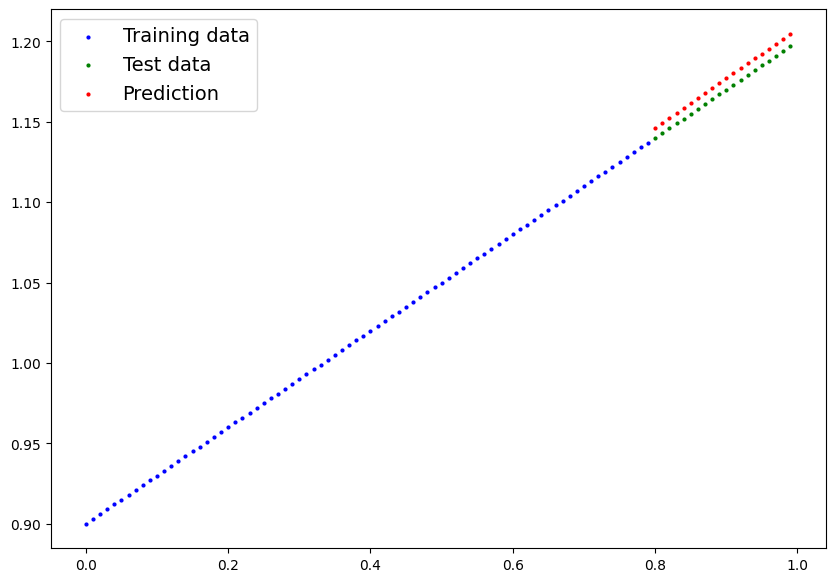

In [82]:
plot_predictions(predictions=y_preds_new)

5. Save your trained model's state_dict() to file.
* Create a new instance of your model class you made in 2. and load in the state_dict() you just saved to it.
* Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [87]:
from pathlib import Path
MODEL_PATH = Path("Models") #create a Path
MODEL_PATH.mkdir(parents=True,exist_ok=True) #create a path dir
MODEL_NAME="01_PyTorch_Workflow_Exercises_model.pt" #create a model name
MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH
print(f"Saving Model to: {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

Saving Model to: Models/01_PyTorch_Workflow_Exercises_model.pt


In [88]:
loaded_model=LinearRegressionModel() #load the model
loaded_model.load_state_dict(torch.load(MODEL_SAVE_PATH)) #load the dict

<All keys matched successfully>

In [89]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3068]])),
             ('linear_layer.bias', tensor([0.9010]))])

In [93]:
loaded_model.eval()
with torch.inference_mode():
  loaded_y_preds=loaded_model(X_test)

loaded_y_preds

tensor([[1.1464],
        [1.1495],
        [1.1526],
        [1.1556],
        [1.1587],
        [1.1618],
        [1.1648],
        [1.1679],
        [1.1710],
        [1.1740],
        [1.1771],
        [1.1802],
        [1.1832],
        [1.1863],
        [1.1894],
        [1.1924],
        [1.1955],
        [1.1986],
        [1.2016],
        [1.2047]])

In [92]:
y_preds_new==loaded_y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [94]:
loaded_model.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.3068]])),
             ('linear_layer.bias', tensor([0.9010]))])